In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [91]:
df = pd.read_csv('data/spambase.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1.0
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1.0
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1.0
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1.0


In [92]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [93]:
drop_column = []
for i in range(len(df.columns)):
    count_zero = 0
    for j in range(len(df)):
        if df[df.columns[i]][j] == 0:
            count_zero +=1
    if count_zero > 4200:
        drop_column.append(df.columns[i])
        print(df.columns[i], count_zero)


word_freq_3d 4554
word_freq_report 4244
word_freq_addresses 4265
word_freq_font 4484
word_freq_lab 4229
word_freq_telnet 4308
word_freq_857 4396
word_freq_415 4386
word_freq_parts 4518
word_freq_pm 4217
word_freq_cs 4453
word_freq_meeting 4260
word_freq_original 4226
word_freq_project 4274
word_freq_table 4538
word_freq_conference 4398


In [94]:
df = df.drop(drop_column, axis=1)

In [95]:
def zerotonega(x):
    return -1 if x == 0 else x

In [96]:
df['label'] = df['label'].astype(int)
df['label'] = df['label'].apply(zerotonega)

In [97]:
print('No spam', round(df['label'].value_counts()[-1]/len(df) * 100,2), '% of the dataset')
print('spam', round(df['label'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No spam 60.6 % of the dataset
spam 39.4 % of the dataset


C:\Users\cuong\anaconda3\envs\cyber\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (-1: non spam|| 1: spam)')

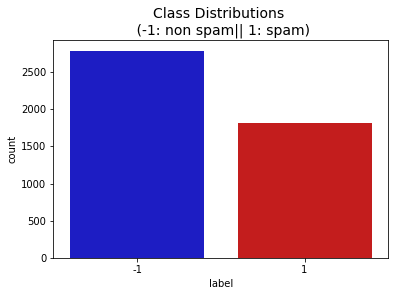

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=df, palette=colors)
plt.title('Class Distributions \n (-1: non spam|| 1: spam)', fontsize=14)

In [99]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['crla_scale'] = std_scaler.fit_transform(df['capital_run_length_average'].values.reshape(-1,1))
df['crll_scale'] = std_scaler.fit_transform(df['capital_run_length_longest'].values.reshape(-1,1))
df['crlt_scale'] = std_scaler.fit_transform(df['capital_run_length_total'].values.reshape(-1,1))
df.drop(['capital_run_length_average',
        'capital_run_length_longest',
        'capital_run_length_total'], axis=1, inplace=True)
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,label,crla_scale,crll_scale,crlt_scale
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4.601000e+03,4.601000e+03,4.601000e+03
mean,0.104553,0.213015,0.280656,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,-0.211910,4.324103e-17,1.235458e-17,2.470916e-17
std,0.305358,1.290575,0.504143,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,0.977395,1.000109e+00,1.000109e+00,1.000109e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.321161e-01,-2.625994e-01,-4.656073e-01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.135824e-01,-2.369413e-01,-4.095278e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,-1.000000,-9.189671e-02,-1.907567e-01,-3.105639e-01
75%,0.000000,0.000000,0.420000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,1.000000,-4.682327e-02,-4.707129e-02,-2.851691e-02
max,4.540000,14.280000,5.100000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,2.610000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1.000000,3.458704e+01,5.099205e+01,2.566085e+01


In [100]:
Xs = df.drop('label', axis=1)
ys = df['label']
ys

0       1
1       1
2       1
3       1
4       1
       ..
4596   -1
4597   -1
4598   -1
4599   -1
4600   -1
Name: label, Length: 4601, dtype: int64

In [101]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 42)

# print("Train dataset: ", len(X_train))
# print("Test dataset: ", len(X_test))
# print("Total: ", len(X_train)+len(X_test))

In [102]:
# traindf_X = pd.DataFrame(X_train, columns=[df.columns[:len(df.columns)-1]])
# traindf_y = pd.DataFrame(y_train, columns=['label'])

# traindf = pd.concat((traindf_X, traindf_y), 1)
# traindf.to_csv('data/spam_train_normal.csv', index = False)

In [103]:
# testdf_X = pd.DataFrame(X_test, columns=[df.columns[:len(df.columns)-1]])
# testdf_y = pd.DataFrame(y_test, columns=['label'])

# testdf = pd.concat((testdf_X, testdf_y), 1)
# testdf.to_csv('data/spam_test_normal.csv', index = False)

In [104]:
mm = MinMaxScaler()
Xs[Xs.columns] = mm.fit_transform(Xs)

In [105]:
Xs

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_edu,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,crla_scale,crll_scale,crlt_scale
0,0.000000,0.044818,0.125490,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487
1,0.046256,0.019608,0.098039,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,0.080460,...,0.000000,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836
2,0.013216,0.000000,0.139216,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,0.145594,...,0.002721,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551
3,0.000000,0.000000,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,...,0.000000,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995
4,0.000000,0.000000,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,...,0.000000,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014059,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492
4597,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090703,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821
4598,0.066079,0.000000,0.058824,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.054422,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386
4599,0.211454,0.000000,0.000000,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.014512,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861


In [106]:
df_scale = pd.concat((Xs, ys), 1)
df_scale

<ipython-input-106-435fae77c697>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_scale = pd.concat((Xs, ys), 1)


,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,crla_scale,crll_scale,crlt_scale,label
0,0.000000,0.044818,0.125490,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1
1,0.046256,0.019608,0.098039,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,0.080460,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,1
2,0.013216,0.000000,0.139216,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,0.145594,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,1
3,0.000000,0.000000,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,1
4,0.000000,0.000000,0.000000,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,0.118774,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0.000200,0.005492,-1
4597,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0.000300,0.000821,-1
4598,0.066079,0.000000,0.058824,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0.000501,0.007386,-1
4599,0.211454,0.000000,0.000000,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0.000400,0.004861,-1


In [107]:
X = Xs.values
y = ys.values

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

print("Train dataset: ", len(X_train))
print("Test dataset: ", len(X_test))
print("Total: ", len(X_train)+len(X_test))

Train dataset:  2300
Test dataset:  2301
Total:  4601


In [109]:
traindf_X = pd.DataFrame(X_train, columns=[Xs.columns])
traindf_y = pd.DataFrame(y_train, columns=['label'])

traindf = pd.concat((traindf_X, traindf_y), 1)
traindf.to_csv('data/spam_train.csv', index = False)

<ipython-input-109-bedc237b80ee>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  traindf = pd.concat((traindf_X, traindf_y), 1)


C:\Users\cuong\anaconda3\envs\cyber\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (-1: non spam|| 1: spam)')

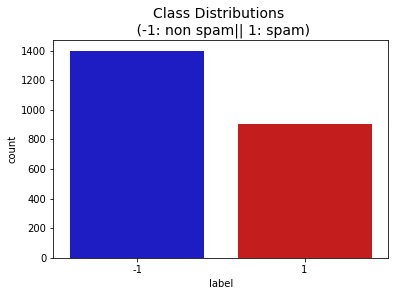

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=traindf, palette=colors)
plt.title('Class Distributions \n (-1: non spam|| 1: spam)', fontsize=14)

In [110]:
testdf_X = pd.DataFrame(X_test, columns=[Xs.columns])
testdf_y = pd.DataFrame(y_test, columns=['label'])

testdf = pd.concat((testdf_X, testdf_y), 1)
testdf.to_csv('data/spam_test.csv', index = False)

<ipython-input-110-672d79fb7d54>:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  testdf = pd.concat((testdf_X, testdf_y), 1)


C:\Users\cuong\anaconda3\envs\cyber\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (-1: non spam|| 1: spam)')

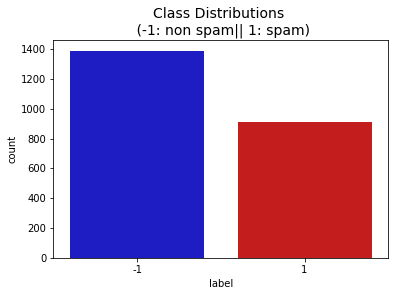

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["#0101DF", "#DF0101"]

sns.countplot('label', data=testdf, palette=colors)
plt.title('Class Distributions \n (-1: non spam|| 1: spam)', fontsize=14)